In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
pd.options.display.float_format = '{:.2f}'.format

In [47]:
df= pd.read_csv('supermarket_sales.csv') 
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.30


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

In [49]:
df.drop(columns=['Time','gross margin percentage'], inplace=True)

In [50]:
df['Date'] = pd.to_datetime(df['Date'])

In [51]:
df.columns= df.columns.str.lower().str.strip()

In [52]:
df.columns

Index(['invoice id', 'branch', 'city', 'customer type', 'gender',
       'product line', 'unit price', 'quantity', 'total', 'date', 'payment',
       'cogs', 'gross income', 'rating'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   invoice id     1000 non-null   object        
 1   branch         1000 non-null   object        
 2   city           1000 non-null   object        
 3   customer type  1000 non-null   object        
 4   gender         1000 non-null   object        
 5   product line   1000 non-null   object        
 6   unit price     1000 non-null   float64       
 7   quantity       1000 non-null   int64         
 8   total          1000 non-null   float64       
 9   date           1000 non-null   datetime64[ns]
 10  payment        1000 non-null   object        
 11  cogs           1000 non-null   float64       
 12  gross income   1000 non-null   float64       
 13  rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 109.5

Univariate Analysis

In [54]:
n_cols=df.select_dtypes('number')
n_cols.head(5)

,unit price,quantity,total,cogs,gross income,rating
0,74.69,7,548.97,522.83,26.14,9.10
1,15.28,5,80.22,76.40,3.82,9.60
2,46.33,7,340.53,324.31,16.22,7.40
3,58.22,8,489.05,465.76,23.29,8.40
4,86.31,7,634.38,604.17,30.21,5.30


In [55]:
n_cols.describe()

,unit price,quantity,total,cogs,gross income,rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,322.97,307.59,15.38,6.97
std,26.49,2.92,245.89,234.18,11.71,1.72
min,10.08,1.00,10.68,10.17,0.51,4.00
25%,32.88,3.00,124.42,118.50,5.92,5.50
50%,55.23,5.00,253.85,241.76,12.09,7.00
75%,77.94,8.00,471.35,448.91,22.45,8.50
max,99.96,10.00,1042.65,993.00,49.65,10.00


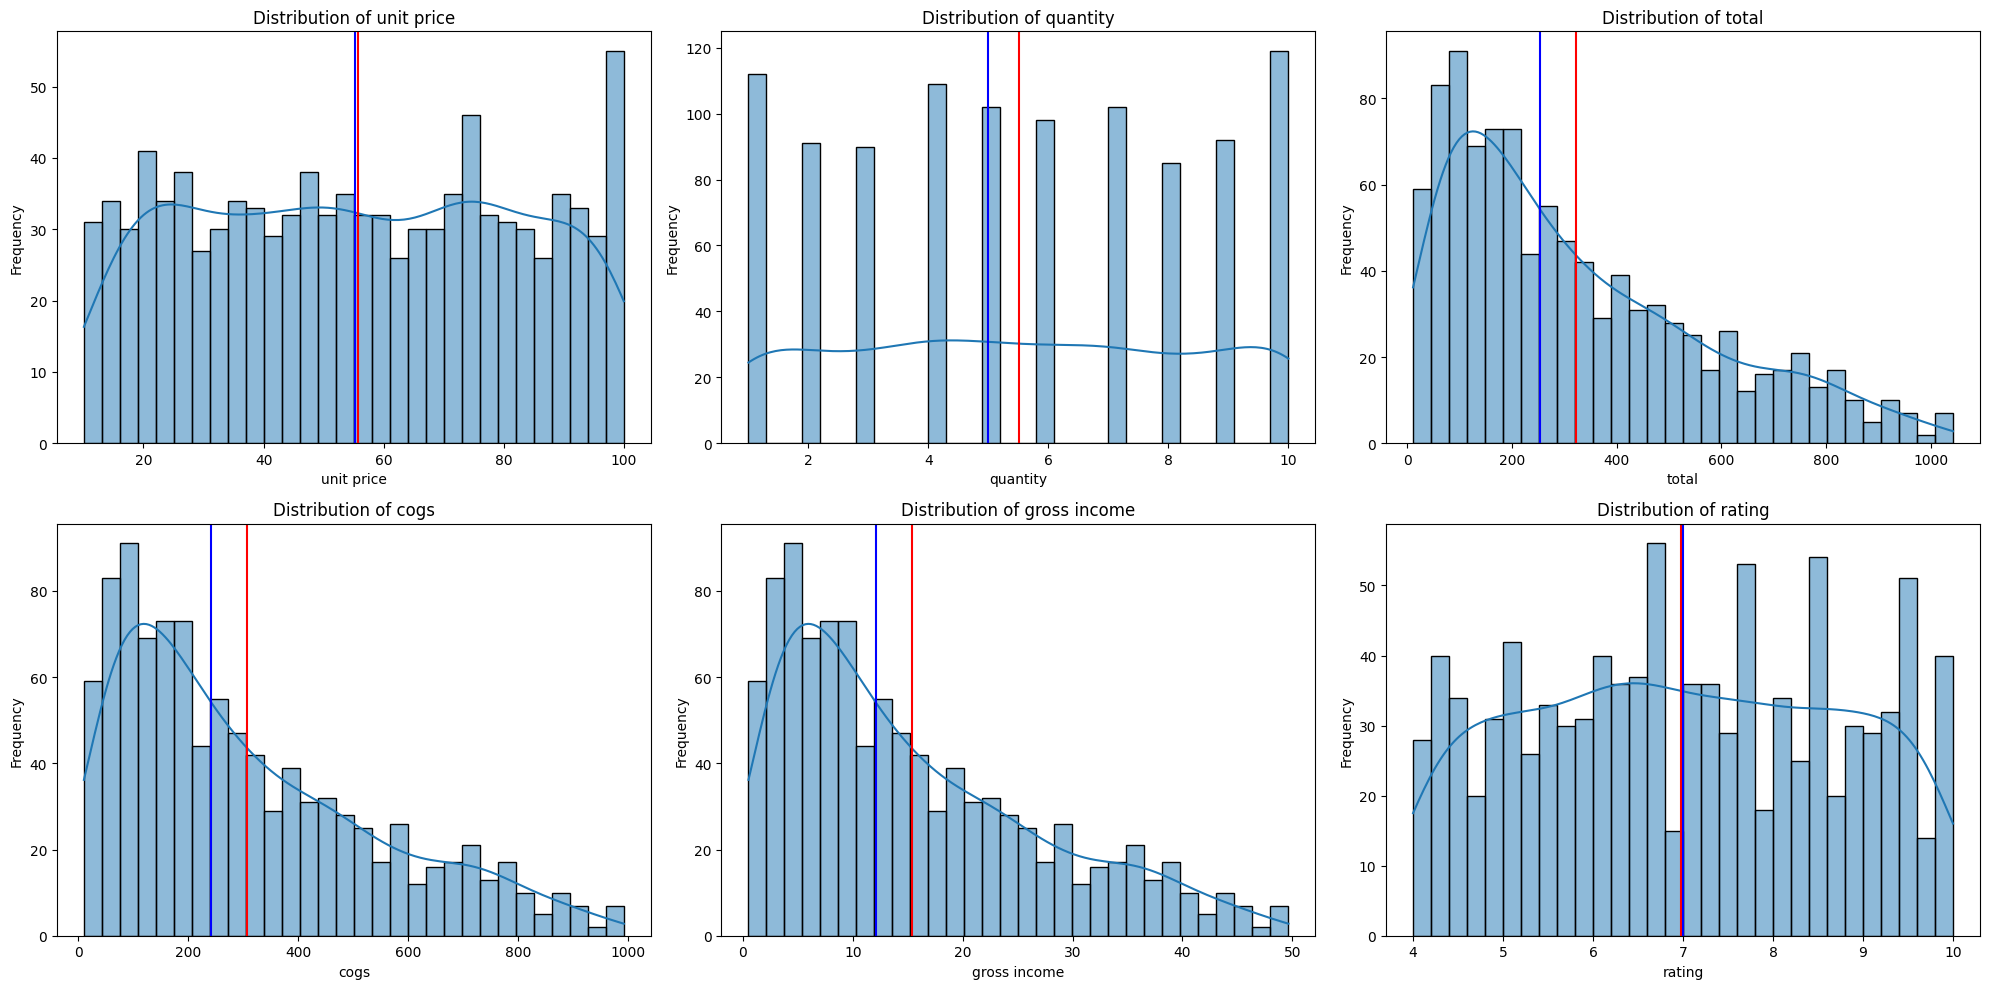

In [56]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(n_cols.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.axvline(df[col].mean(), color='red')
    plt.axvline(df[col].median(), color='blue')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.tight_layout()
    

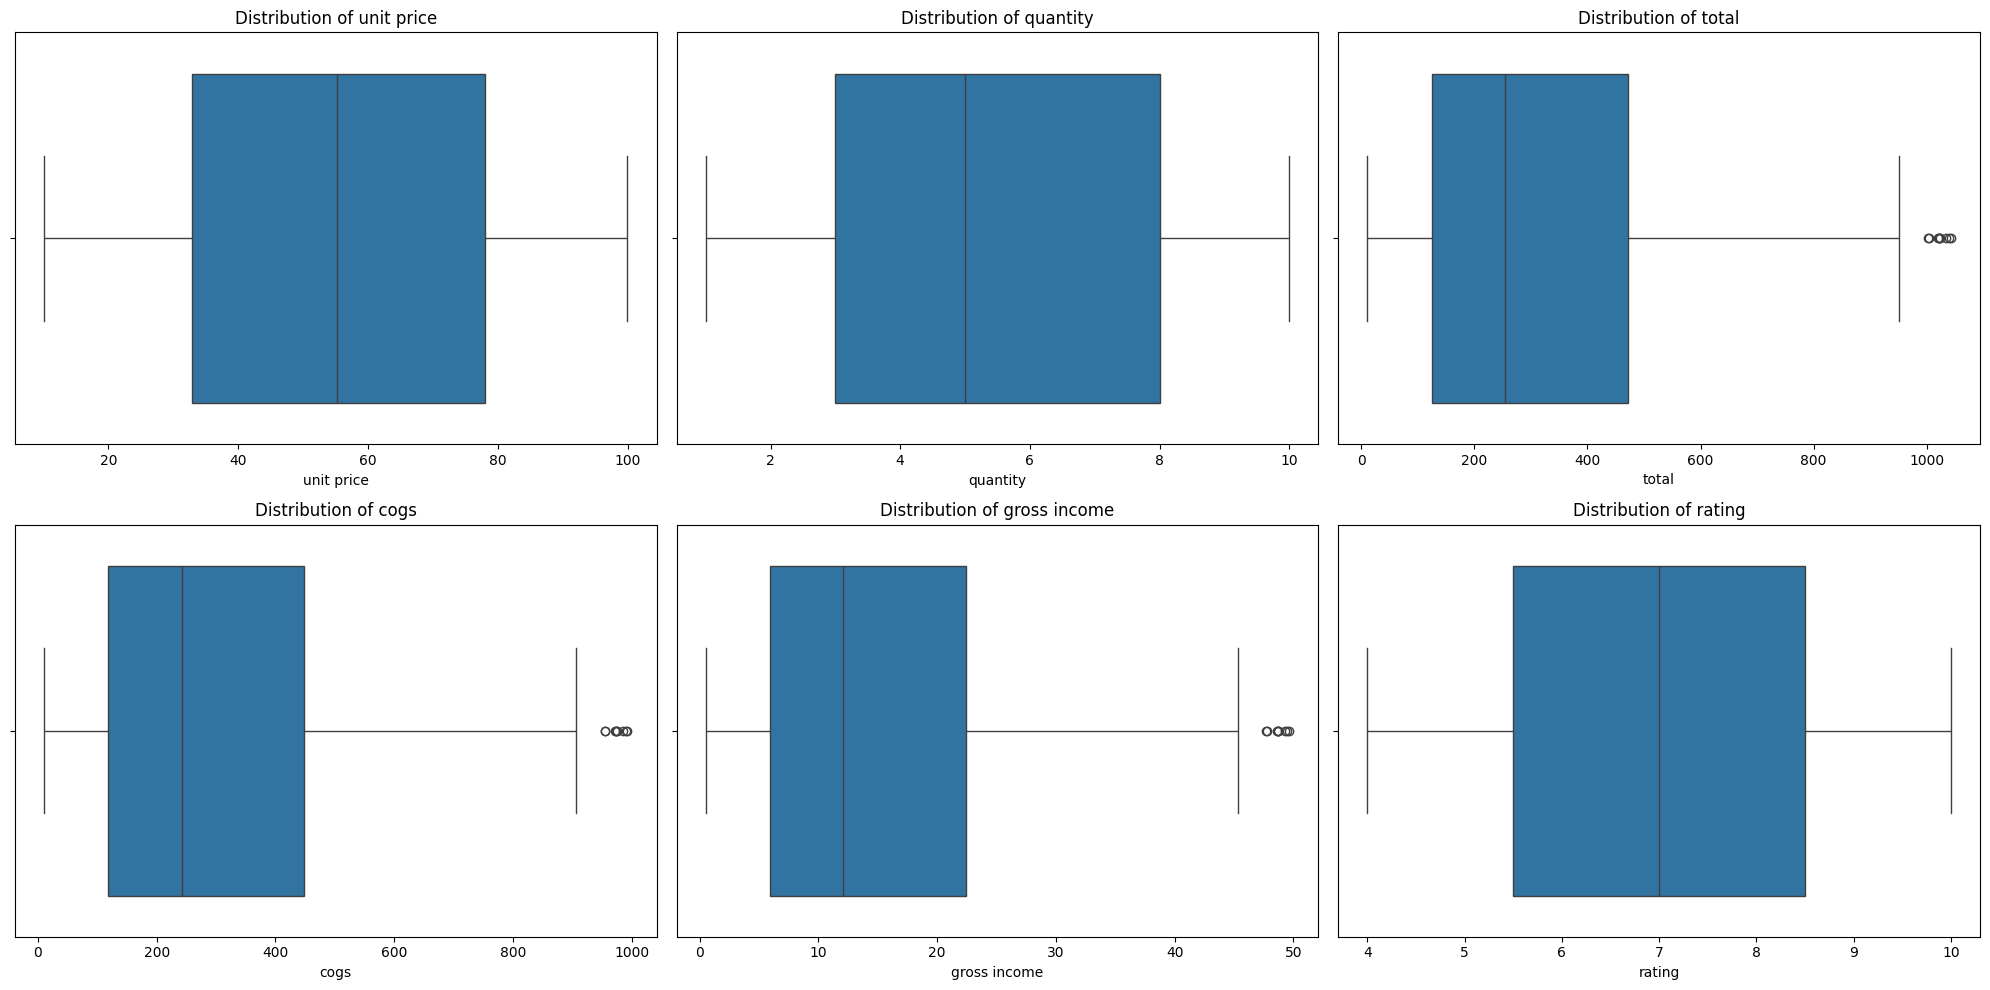

In [57]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(n_cols.columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
    

- the distribution of unit price looks like a uniform shape, the prices looks balanced, there’s no clear outliers in the boxplot.

- quantities are almost equal across the range from 1 to 10, it seems normal for sales. also no outliers in the boxplot.

- the total column is right skewed, most of the sales are lower in value, there are some high values showing up as outliers in the boxplot.

- cogs and gross income same pattern like total since they’re related.

- ratings are kind of centered around 7, there is no outliers, looks like most customers are satisfied.


In [58]:
c_cols=df.select_dtypes('object')
c_cols=c_cols.iloc[:,1:]
c_cols.head(5)

,branch,city,customer type,gender,product line,payment
0,A,Yangon,Member,Female,Health and beauty,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,A,Yangon,Member,Male,Health and beauty,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,Ewallet


In [59]:
for col in c_cols.columns:
    print(f"Unique values in {col}: {c_cols[col].unique()}")
    print(f"Number of unique values in {col}: {c_cols[col].nunique()}")
    print('='*50)

Unique values in branch: ['A' 'C' 'B']
Number of unique values in branch: 3
Unique values in city: ['Yangon' 'Naypyitaw' 'Mandalay']
Number of unique values in city: 3
Unique values in customer type: ['Member' 'Normal']
Number of unique values in customer type: 2
Unique values in gender: ['Female' 'Male']
Number of unique values in gender: 2
Unique values in product line: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Number of unique values in product line: 6
Unique values in payment: ['Ewallet' 'Cash' 'Credit card']
Number of unique values in payment: 3


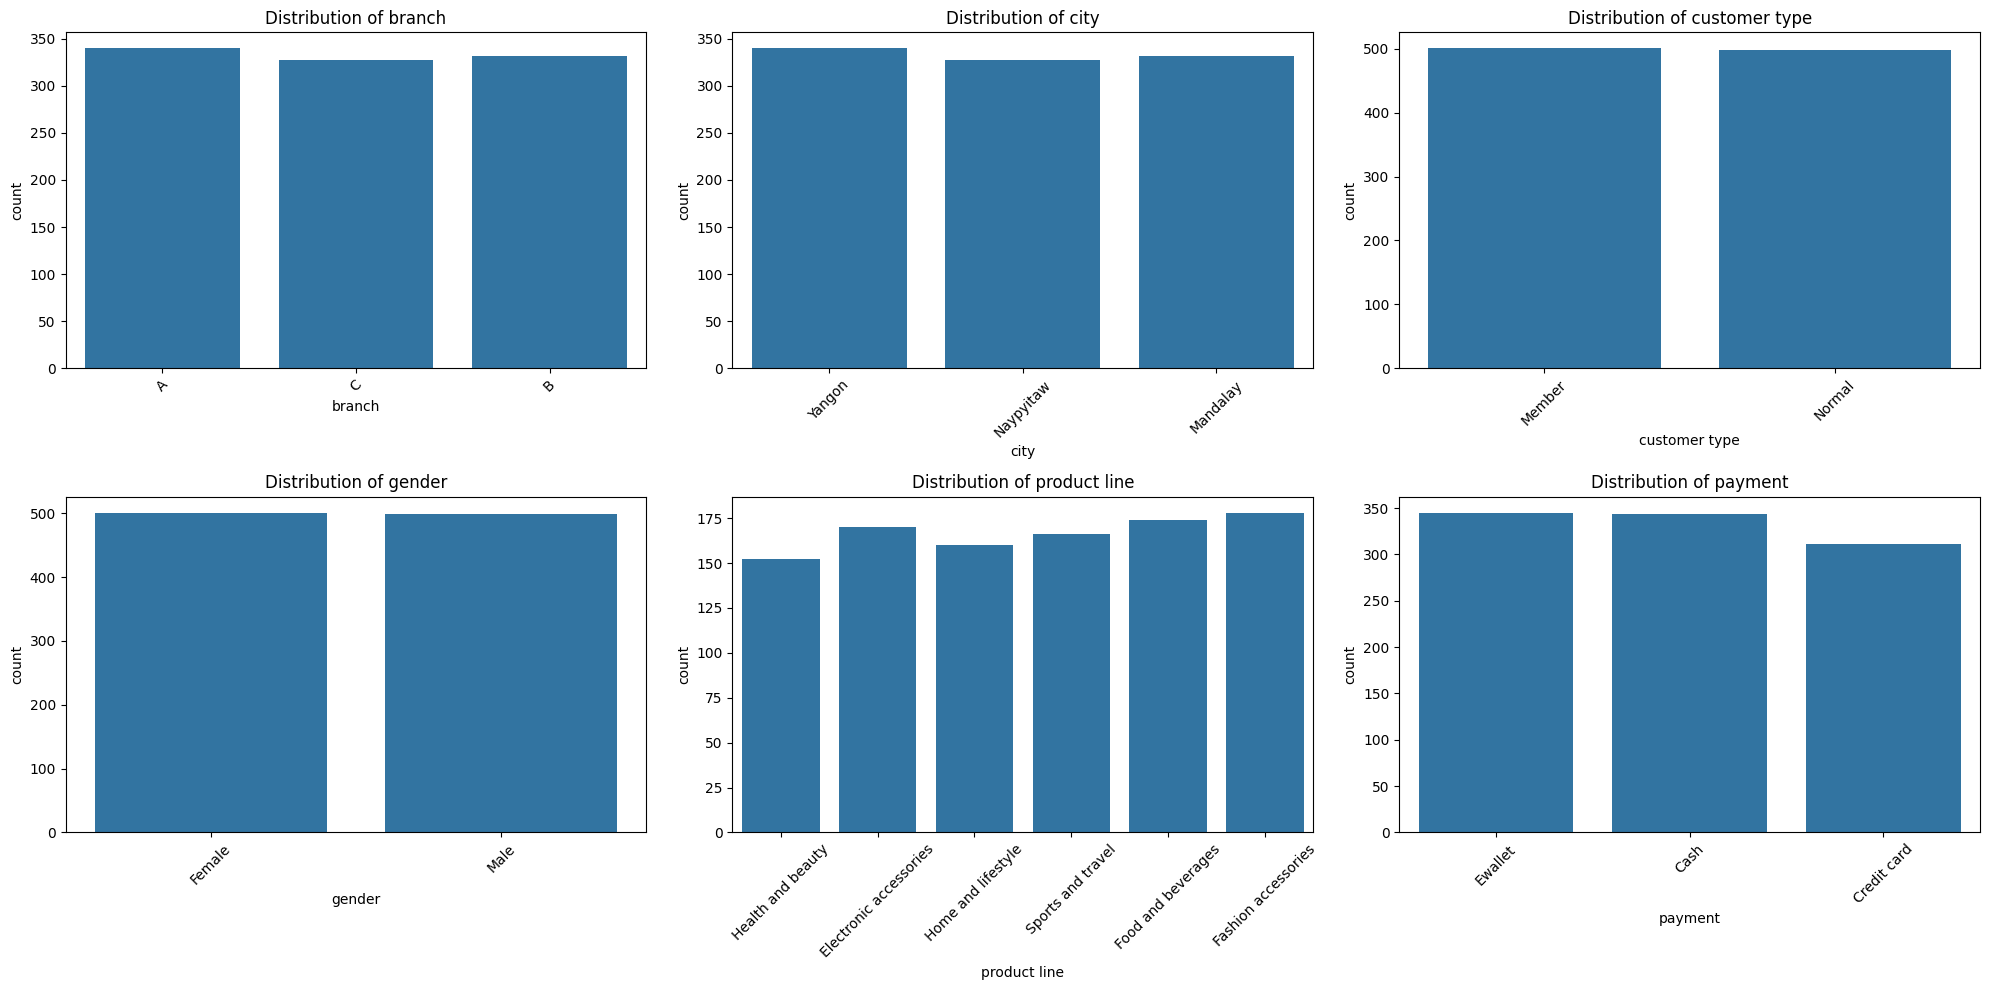

In [60]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(c_cols.columns):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()

- branches A, B, and C are almost equal in count, the data looks balanced across all branches, city same as branch, each city has one branch so both are basically the same.

- customer types are almost 50-50 between Member and Normal. the company is dealing with both types equally, number of male and female customers is almost the same

- all product lines have close numbers, but “fashion accessories” and “food and beverages” are a bit higher.

- cash and ewallet are used more than credit cards.


In [61]:
cor=df[['unit price', 'quantity', 'total']]

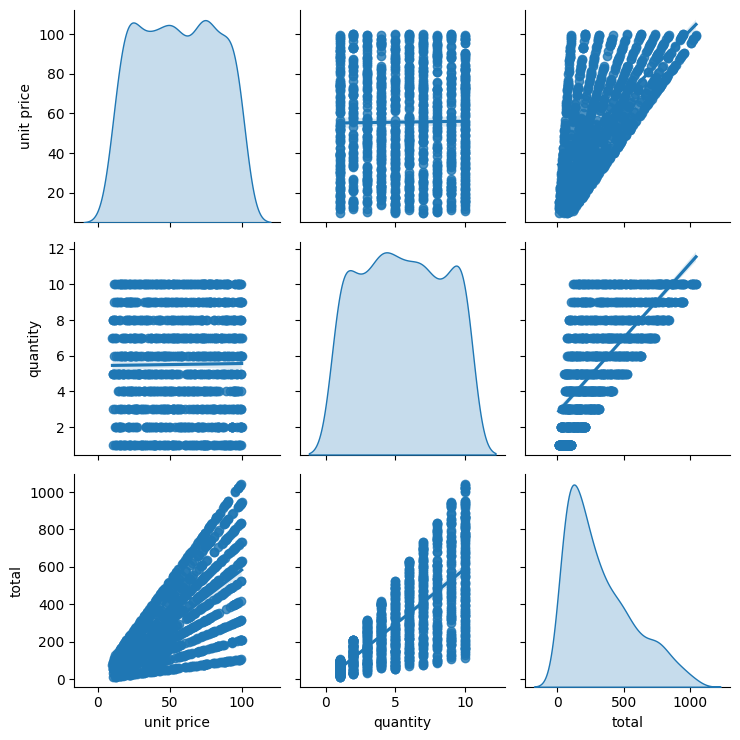

In [62]:
sns.pairplot(cor,kind='reg', diag_kind='kde')
plt.tight_layout()

<Axes: >

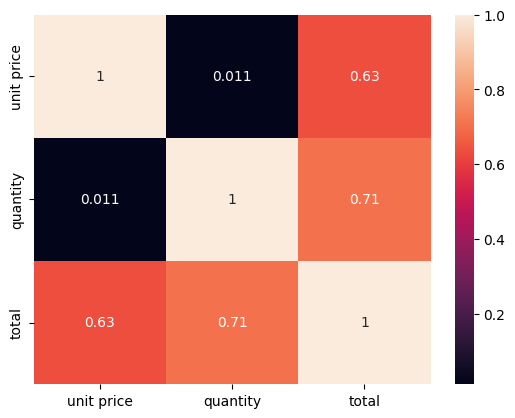

In [63]:
sns.heatmap(cor.corr(), annot=True)

- There is a strong positive relationship between quantity and total The pairplot shows that as the number of quantity increases, the total amount also increases, This is confirmed by the correlation coefficient of 0.71.

- Between unit price and total, there is a moderate positive relationship, When the unit price is higher, the total amount is usually higher too, The correlation value is 0.63.

- The relationship between unit price and quantity is almost zero, and the correlation is just 0.01, which means price does not affect how many items are bought.

- Quantity has the biggest impact on total sales, Price and quantity are not directly related.


In [64]:
total_sales_by_branch=df.groupby(['branch'],as_index=False)['total'].sum()
total_sales_by_branch

,branch,total
0,A,106200.37
1,B,106197.67
2,C,110568.71


In [65]:
px.pie(data_frame=total_sales_by_branch,names='branch',values='total', title='Total Sales by Branch', hole=0.5)

In [66]:
px.scatter(data_frame=total_sales_by_branch, x='branch', y='total', size='total', title='Total Sales by Branch')

In [67]:
invoices_per_branch=df.groupby(['branch'],as_index=False)['invoice id'].count().rename(columns={'invoice id':'number of invoices'})
invoices_per_branch

,branch,number of invoices
0,A,340
1,B,332
2,C,328


In [68]:
px.scatter(data_frame=invoices_per_branch, x='branch', y='number of invoices', size='number of invoices', title='Total Transactions by Branch')

Total Sales vs. Number of Invoices by Branch
- Branch C had the highest total sales, even though it didn’t have the most invoices.  
- Branch A had the highest number of invoices, but its total sales were lower than C.

In [69]:
total_sales_by_product=df.groupby(['product line'],as_index=False)['total'].sum().sort_values(by='total', ascending=False)
total_sales_by_product

,product line,total
2,Food and beverages,56144.84
5,Sports and travel,55122.83
0,Electronic accessories,54337.53
1,Fashion accessories,54305.89
4,Home and lifestyle,53861.91
3,Health and beauty,49193.74


In [70]:
px.pie(data_frame=total_sales_by_product, names='product line', values='total', title='Total Sales by Product Line', hole=0.5)

The pie chart shows that Food and Beverages and Sports and travel had the highest total sales among all product lines.

In [71]:
gender_by_branch=df.groupby(['branch','gender' ],as_index=False)['gender'].value_counts()
gender_by_branch

,branch,gender,count
0,A,Female,161
1,A,Male,179
2,B,Female,162
3,B,Male,170
4,C,Female,178
5,C,Male,150


In [72]:
px.bar(data_frame=gender_by_branch, x='branch', y='count', color='gender', barmode='group')

In [73]:
df.groupby(['branch', 'product line','gender'])['gender'].value_counts().reset_index()

,branch,product line,gender,count
0,A,Electronic accessories,Female,28
1,A,Electronic accessories,Male,32
2,A,Fashion accessories,Female,28
3,A,Fashion accessories,Male,23
4,A,Food and beverages,Female,23
5,A,Food and beverages,Male,35
6,A,Health and beauty,Female,21
7,A,Health and beauty,Male,26
8,A,Home and lifestyle,Female,32
9,A,Home and lifestyle,Male,33


The bar chart shows differences in gender distribution across branches:

- Branch A has more male customers.
- Branch C has more female customers.
- Branch B shows a nearly balanced distribution.

One possible reason for this could be the type of products or services offered in each branch.  
Branch C may attract more female customers due to product lines like Fashion accessorie and Food and beverage.  
Branch A could offer more Electronic accessories products.


Maltivariate Analysis

In [74]:
branch_daily_sales=df[['date','branch','total']]
branch_daily_sales = df.groupby(['date','branch'],as_index=False)['total'].sum()
branch_daily_sales = branch_daily_sales.pivot(index='date', columns='branch', values='total')
branch_daily_sales.head(5)

branch,A,B,C
date,,,
2019-01-01,2371.32,1536.70,837.16
2019-01-02,307.05,1162.80,475.65
2019-01-03,937.41,1016.69,124.03
2019-01-04,483.26,510.58,629.84
2019-01-05,2024.51,486.76,1025.42


In [75]:
px.line(data_frame=branch_daily_sales, title='Daily Sales by Branch')

The line chart shows the daily sales trend for each branch over time.

All three branches follow a similar sales pattern, there is no single branch that consistently leads every day. 


In [76]:
average_rating_by_branch_gender = df.groupby(['branch', 'gender'],as_index=False)['rating'].mean()
average_rating_by_branch_gender 

,branch,gender,rating
0,A,Female,6.84
1,A,Male,7.20
2,B,Female,6.88
3,B,Male,6.76
4,C,Female,7.16
5,C,Male,6.97


In [77]:
px.scatter(data_frame=average_rating_by_branch_gender, x='branch', y='rating', color='gender', size='rating',  title='Average rating by branch and gender') 

In Branch A, men's ratings were higher than women's, This suggests that Branch A might offer products that are more appealing to men. While in Branch C, women's ratings were higher, which could indicate that this branch has better products for women.

As for Branch B, it received the lowest ratings from both men and women compared to the other branches. This clearly points to an issue with customer satisfaction in Branch B, and we need to investigate the root causes of this problem.

In [78]:
average_rating_by_branch_product=df.groupby(['branch', 'product line'])['rating'].mean().reset_index()
average_rating_by_branch_product=average_rating_by_branch_product.pivot(index='product line', columns='branch', values='rating')
average_rating_by_branch_product

branch,A,B,C
product line,,,
Electronic accessories,6.91,7.12,6.75
Fashion accessories,6.88,6.72,7.44
Food and beverages,7.25,6.99,7.08
Health and beauty,6.90,7.10,7.00
Home and lifestyle,6.93,6.52,7.06
Sports and travel,7.26,6.51,7.03


In [79]:
px.line(data_frame=average_rating_by_branch_product, title='Average rating by product line and branch')

Average Ratings by Product Line and Branch
- Branch A had the highest rating in Food and Beverages (7.25) and Sports and travel (7.26).
- Branch B performed best in Electronic Accessories (7.12) and Health and Beauty (7.10).
- Branch C led in Fashion Accessories (7.44) and Home and Lifestyle (7.06).

This indicates that each branch has strengths in different product lines. 
 
Branch A seems to be most appreciated in food and sports products, while Branch C best in fashion and home products. 

Branch B performs well in electronics and health products.

Fashion Accessories are the top rated product, with customers giving them an average rating of (7.44).


In [80]:
invoices_by_payment_branch=df.pivot_table(index='branch', columns='payment', values='invoice id', aggfunc='count')
invoices_by_payment_branch

payment,Cash,Credit card,Ewallet
branch,,,
A,110,104,126
B,110,109,113
C,124,98,106


In [81]:
px.bar(data_frame=invoices_by_payment_branch, barmode='group', title='Total transactions by payment method and branch', labels={'value':'Total transactions'})

The bar chart shows how customers paid in each branch.

- Ewallet is the most commonly used payment method overall, especially in Branch A (126 transactions).
- Cash is slightly more popular in Branch C than in A or B.
- Credit card usage is low across all branches.

This shows that Ewallet payment methods are more common in Branch A, while cash is more common in Branch C.

However, there's a clear issue with the credit card method: it's the least used payment option across all branches. This is a problem that needs a solution, perhaps by offering promotions for purchases made with a credit card.

In [82]:
gender_product_invoices=df.groupby(['gender','product line'], as_index=False)['invoice id'].count().rename(columns={'invoice id':'number of invoices'})
gender_product_invoices=gender_product_invoices.pivot(index='product line', columns='gender', values='number of invoices')
gender_product_invoices

gender,Female,Male
product line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


In [83]:
px.line(data_frame=gender_product_invoices,labels={'value':'number of invoices'}, title='Product Invoices by Gender')


The line chart compares the number of invoices made by males and females across different product lines.

- Fashion accessories and Sports and travel are more popular among female customers.
- Health and beauty products are significantly more popular among men.(88 vs. 64).
- Other products, like Food and beverages, Home and lifestyle, and Electronic accessories, were quite similar in popularity.

This analysis revealed a very important and somewhat surprising insight: men significantly outpace women in purchasing Health and Beauty products. This is unexpected, as these products are typically considered to be of greater interest to women.


In [84]:
product_stats=df.groupby(['product line'],as_index=False).agg({'total':'sum','quantity':'sum','unit price':'mean'})
product_stats

,product line,total,quantity,unit price
0,Electronic accessories,54337.53,971,53.55
1,Fashion accessories,54305.89,902,57.15
2,Food and beverages,56144.84,952,56.01
3,Health and beauty,49193.74,854,54.85
4,Home and lifestyle,53861.91,911,55.32
5,Sports and travel,55122.83,920,56.99


In [85]:
px.scatter(data_frame=product_stats, x='total', y='quantity', size='unit price', color='product line', title='Product Stats',labels={'total':'Total Sales', 'quantity':'Quantity Sold', 'unit price':'Average Unit Price'})

The scatter plot shows how different product lines performed in terms of total sales, quantity sold, and average unit price.

- Food and Beverages achieved the highest total sales overall.
- Electronic Accessories had the highest quantity sold but slightly lower total sales, likely due to a lower average unit price.
- Fashion Accessories had strong total sales due to their higher unit price
- Health and Beauty had the lowest total sales and quantity sold among all products.

This analysis shows that high sales can come from either large quantities (like Electronic Accessories) or higher prices (like Fashion Accessories).  

In [86]:
product_city_sales=df.pivot_table(index='product line', columns='city', values='total', aggfunc='sum')  
product_city_sales

city,Mandalay,Naypyitaw,Yangon
product line,,,
Electronic accessories,17051.44,18968.97,18317.11
Fashion accessories,16413.32,21560.07,16332.51
Food and beverages,15214.89,23766.85,17163.10
Health and beauty,19980.66,16615.33,12597.75
Home and lifestyle,17549.16,13895.55,22417.20
Sports and travel,19988.20,15761.93,19372.70


In [87]:
px.bar(data_frame=product_city_sales,barmode='group',title='Sales by product line and city', labels={'value':'Total sales'})

In [88]:
px.scatter(data_frame=product_city_sales, title='Sales by product line and city', labels={'value':'Total sales'})

The charts show how each product line performed in total sales across Mandalay, Naypyitaw, and Yangon.

- Naypyitaw had the highest sales in Food and Beverages and Fashion Accessories, showing strong demand for daily items.
- Mandalay had the highest sales in Health and Beauty and Sports and Travel, indicating strong interest in personal care and travel products there.

Overall, product distribution varies from city to city, likely due to differences in customer preferences in each city.
